In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
df_purch = pd.read_csv('purchase data.csv')

In [ ]:
df_purch.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0


In [ ]:
df_purch.describe()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,5.869300e+04,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,2.000003e+08,349.431074,0.249399,0.844309,0.691973,0.840799,0.248070,1.392074,1.780999,2.006789,2.159945,2.654798,0.343840,0.315608,0.042799,0.117851,0.035865,0.385889,0.393113,38.793962,1.101579,121841.644319,0.774198,0.655904
std,1.443167e+02,212.045058,0.432669,1.633083,1.498734,1.631628,0.431897,0.091139,0.170868,0.046867,0.089825,0.098272,0.474993,0.464762,0.202405,0.322434,0.185954,0.486809,0.488446,12.052447,0.652499,40643.740678,0.663247,0.794162
min,2.000000e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,2.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000
25%,2.000001e+08,161.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.340000,1.580000,1.970000,2.120000,2.630000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,95541.000000,0.000000,0.000000
50%,2.000003e+08,343.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.170000,2.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,1.000000,117971.000000,1.000000,0.000000
75%,2.000004e+08,530.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.470000,1.890000,2.060000,2.240000,2.700000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,46.000000,1.000000,138525.000000,1.000000,1.000000
max,2.000005e+08,730.000000,1.000000,5.000000,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,2.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000


In [ ]:
df_purch.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58693 entries, 0 to 58692
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 58693 non-null  int64  
 1   Day                58693 non-null  int64  
 2   Incidence          58693 non-null  int64  
 3   Brand              58693 non-null  int64  
 4   Quantity           58693 non-null  int64  
 5   Last_Inc_Brand     58693 non-null  int64  
 6   Last_Inc_Quantity  58693 non-null  int64  
 7   Price_1            58693 non-null  float64
 8   Price_2            58693 non-null  float64
 9   Price_3            58693 non-null  float64
 10  Price_4            58693 non-null  float64
 11  Price_5            58693 non-null  float64
 12  Promotion_1        58693 non-null  int64  
 13  Promotion_2        58693 non-null  int64  
 14  Promotion_3        58693 non-null  int64  
 15  Promotion_4        58693 non-null  int64  
 16  Promotion_5        586

In [ ]:
df_purch.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

DATA SEGMENATION 

In [15]:
scaler = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/scaler.pickle', 'rb'))

In [13]:
pca = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/pca.pickle', 'rb'))

In [14]:
kmeans_pca = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/kmeans_pca.pickle', 'rb'))

STANDARDIZATION


In [17]:
features = df_purch[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purch_seg_std = scaler.transform(features)

PCA

In [18]:
df_purch_seg_pca = pca.transform(df_purch_seg_std)

K-MEANS PCA

In [20]:
purch_seg_kmeans_pca = kmeans_pca.predict(df_purch_seg_pca)

In [22]:
df_purch_pred = df_purch.copy()
df_purch_pred['Segment'] = purch_seg_kmeans_pca

DESCRIPTIVE ANALYSIS BY SEGMENTS

Data Analysis by Customer

In [24]:
df_purch_pred.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0,1
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1


In [25]:
temp1 = df_purch_pred[['ID', 'Incidence']].groupby(['ID'], as_index = False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence': 'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [26]:
temp2 = df_purch_pred[['ID', 'Incidence']].groupby(['ID'], as_index = False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence': 'N_Purchases'})
temp3 = temp1.join(temp2)
temp3.head()



,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [27]:
temp3['Ave_N_Purch'] = temp3['N_Purchases'] / temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Ave_N_Purch
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [28]:
temp4 = df_purch_pred[['ID', 'Segment']].groupby(['ID'], as_index=False).mean()
temp4 = temp4.set_index('ID')
df_purch_desc = temp4.join(temp3)

In [29]:
df_purch_desc

,Segment,N_Visits,N_Purchases,Ave_N_Purch
ID,,,,
200000001,1,101,9,0.089109
200000002,0,87,11,0.126437
200000003,1,97,10,0.103093
200000004,1,85,11,0.129412
200000005,3,111,13,0.117117
...,...,...,...,...
200000496,2,120,20,0.166667
200000497,1,120,43,0.358333
200000498,2,131,39,0.297710


In [34]:
seg_prop = df_purch_desc[['N_Purchases', 'Segment']].groupby(['Segment']).count() / df_purch_desc.shape[0]
seg_prop = seg_prop.rename(columns = {'N_Purchases': 'Segment Proportions'})
seg_prop.head()

,Segment Proportions
Segment,
0,0.196
1,0.376
2,0.208
3,0.220


Text(0.5, 1.0, 'Segment Proportions')

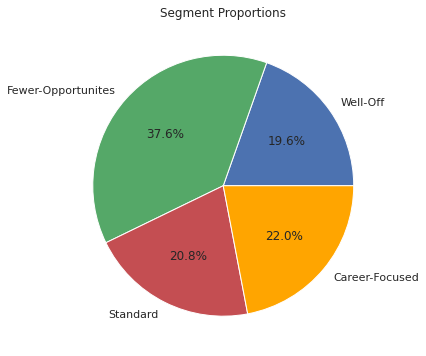

In [36]:
plt.figure(figsize = (9,6))
plt.pie(seg_prop['Segment Proportions'],
        labels = ['Well-Off', 'Fewer-Opportunites', 'Standard', 'Career-Focused'],
        autopct = '%1.1f%%',
        colors = ('b','g','r','orange'))
plt.title('Segment Proportions')


PURCHASE OCCASION AND PURCHASE INCIDENCE

In [37]:
seg_mean = df_purch_desc.groupby(['Segment']).mean()

In [38]:
seg_mean

,N_Visits,N_Purchases,Ave_N_Purch
Segment,,,
0,117.295918,34.602041,0.284478
1,113.835106,22.792553,0.201755
2,117.471154,24.817308,0.212364
3,123.454545,39.827273,0.283102


In [39]:
seg_std = df_purch_desc.groupby(['Segment']).std()

Text(0.5, 1.0, 'Average Number of Store Visits by Segment')

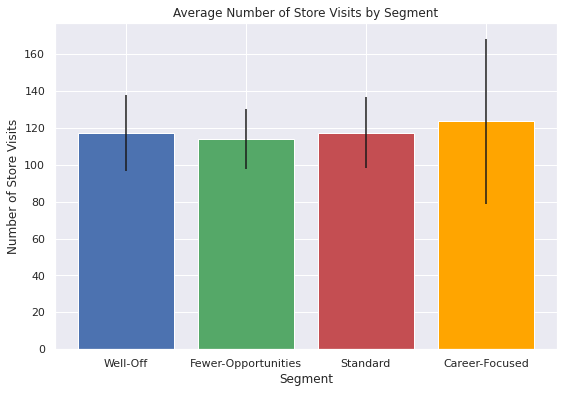

In [42]:
plt.figure(figsize = (9,6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Well-Off', 'Fewer-Opportunities', 'Standard', 'Career-Focused'),
        height = seg_mean['N_Visits'],
        yerr = seg_std['N_Visits'],
        color = ('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment')

Text(0.5, 1.0, 'Number Purchases by Segment')

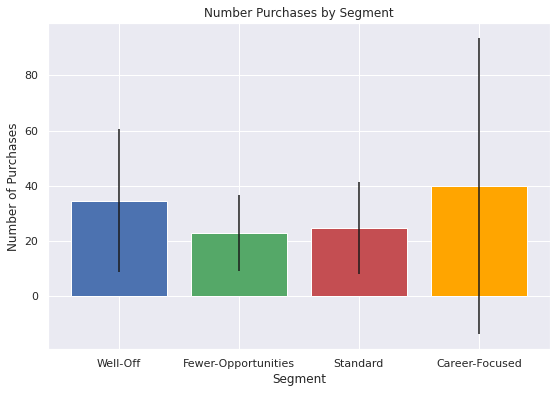

In [46]:
plt.figure(figsize = (9,6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Well-Off', 'Fewer-Opportunities', 'Standard', 'Career-Focused'),
        height = seg_mean['N_Purchases'],
        yerr = seg_std['N_Purchases'],
        color = ('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Purchases')
plt.title('Number Purchases by Segment')

Text(0.5, 1.0, 'Average Number of Purchases by Segment')

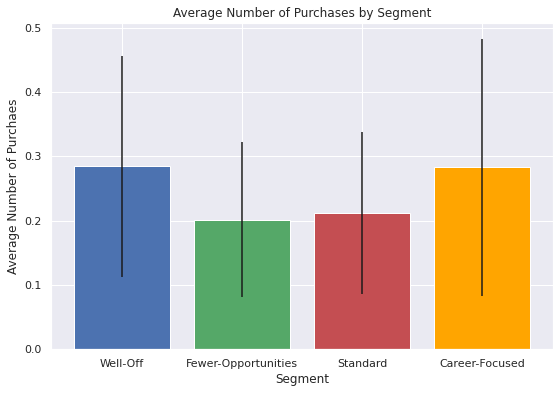

In [49]:
plt.figure(figsize = (9,6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Well-Off', 'Fewer-Opportunities', 'Standard', 'Career-Focused'),
        height = seg_mean['Ave_N_Purch'],
        yerr = seg_std['Ave_N_Purch'],
        color = ('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Average Number of Purchaes')
plt.title('Average Number of Purchases by Segment')

BRAND CHOICE

In [50]:
df_purch_in = df_purch_pred[df_purch_pred['Incidence'] == 1]


In [51]:
brand_dummies = pd.get_dummies(df_purch_in['Brand'], prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID'] = df_purch_in['Segment'], df_purch_in['ID']
brand_dummies

,1,2,3,4,5,Segment,ID
6,0,1,0,0,0,1,200000001
11,0,0,0,0,1,1,200000001
19,1,0,0,0,0,1,200000001
24,0,0,0,1,0,1,200000001
29,0,1,0,0,0,1,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,1,200000500
58648,1,0,0,0,0,1,200000500
58674,0,1,0,0,0,1,200000500
58687,0,1,0,0,0,1,200000500


In [52]:
temp = brand_dummies.groupby(['ID'], as_index = True).mean()

In [53]:
mean_brand_choice = temp.groupby(['Segment'], as_index = True).mean()

Text(0.5, 1.0, 'Average Brand Choice')

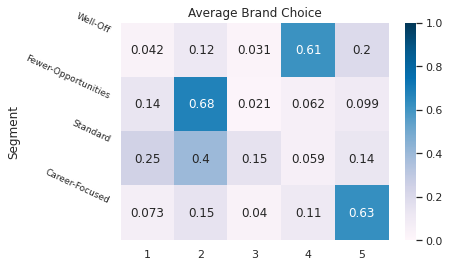

In [63]:
sns.heatmap(mean_brand_choice,
            vmin = 0,
            vmax = 1,
            cmap = 'PuBu',
            annot = True)
plt.yticks([0, 1, 2, 3], ['Well-Off', 'Fewer-Opportunities', 'Standard', 'Career-Focused'], rotation = -25, fontsize = 9)
plt.title('Average Brand Choice')